 Steps Involved:
 
-> Display dataset imbalance/skewness 
-> Perform histogram equalization preferably CLAHE(Contrast Limited Adaptive Histogram Equalization)
-> Plot histograms of the original and equalized images 
-> Remove noises using gaussian blur 
-> Perform image segmentation using k-means or background subtraction 
-> put a threshold on too bright/dark or blur images 
-> perform image augmentation and ZCA whitening. 

In [1]:
#printing the current working directory of the project
#import all the necessary libraries here 
#plt.style.available 
import glob
import os 
import cv2
import numpy
import glob
import pandas as pd
from numpy import asarray 
from numpy import clip 
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
print("Current Working Directory " , os.getcwd())
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Current Working Directory  C:\Users\Suyash Singh\Desktop\preprocess_files\etl_pipeline


In [2]:
#this will change the working diectory to the desired location where the dataset is located...
# in our case the dataset is located : D:\datasets\data
try:  
    os.chdir("D:\datasets\data")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")  

Directory changed


In [3]:
#this will append the name of all images in the particular folder
#path to the folder where the images are stored 
folders = glob.glob('D:\datasets\data\\*')
imagenames_list = []
counter=0 
array9=[]
dict={}

for folder in folders:
    counter=0
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)
        counter+=1
    array9.append(counter)
    str=folder.split("D:\\datasets\\data\\")[1]
    dict[str]=counter 
    
print("the list of photos in each folder is given as below \n",dict)
print("\n \n")
print("All of the given photos are in jpg format ")

the list of photos in each folder is given as below 
 {'Chukar': 268, 'Feral_dogs': 107, 'Gazelle': 3, 'Hare': 267, 'Human': 292, 'Ibex': 25, 'Ladakh_urial': 108, 'Livestock': 364, 'Lynx': 26, 'Marmot': 17, 'Pallas_Cat': 70, 'Pica': 200, 'Red_fox': 259, 'Snow_leo': 261, 'Stoat_Marten_Weasel': 11, 'Tibetian sand fox': 4, 'wild ass': 87, 'Wolf': 269}

 

All of the given photos are in jpg format 


In [4]:
#this will show image statistics in cr2 format 
dict_new={}
for folder in folders:
    counter=0
    for f in glob.glob(folder+'/*.cr2'):
        imagenames_list.append(f)
        counter+=1
    array9.append(counter)
    str=folder.split("D:\\datasets\\data\\")[1]
    dict_new[str]=counter 
print(dict_new)

print(" \n \n All the given photos are in rc2 format and it needs to be stored in jpeg format")

#from the image statistics we were able to  infer that "Gazelle" and "wild ass" were stored in the wrong format 
# 11 Gazelle were in cr2 format 
# 30 wild ass were in cr2 format 



{'Chukar': 0, 'Feral_dogs': 0, 'Gazelle': 11, 'Hare': 0, 'Human': 0, 'Ibex': 0, 'Ladakh_urial': 0, 'Livestock': 0, 'Lynx': 0, 'Marmot': 0, 'Pallas_Cat': 0, 'Pica': 0, 'Red_fox': 0, 'Snow_leo': 0, 'Stoat_Marten_Weasel': 0, 'Tibetian sand fox': 0, 'wild ass': 30, 'Wolf': 0}
 
 
 All the given photos are in rc2 format and it needs to be stored in jpeg format


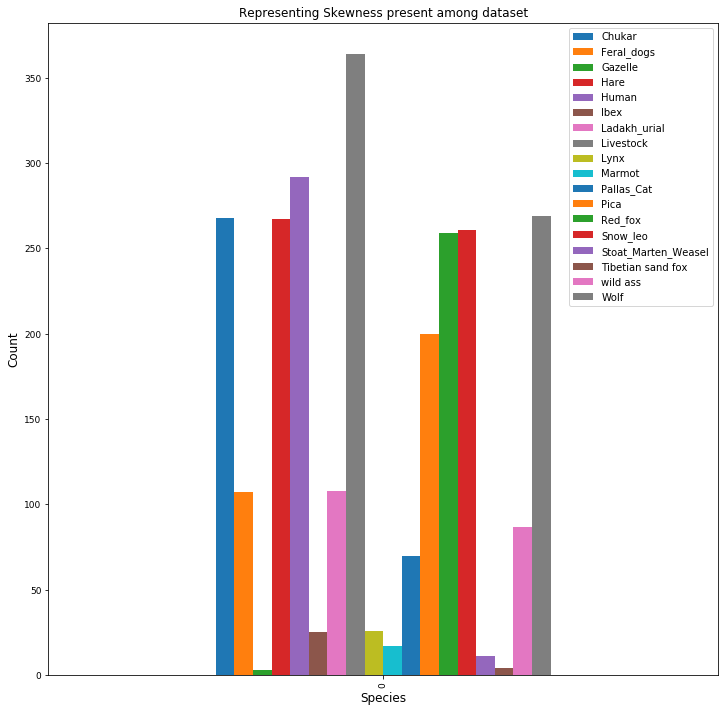

In [5]:
'''try to make the visualisation better look into more cool graphs '''
# before starting into any project deep dive into data governance literacy and quality 

df=pd.DataFrame(dict,index=[0])
# visualise the skewness of data using matplotlib (only images in jpg format) 
ax = df.plot(kind='bar', title ="Representing Skewness present among dataset", figsize=(12,12), legend=True, fontsize=9)
ax.set_xlabel("Species", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [6]:
dict 

{'Chukar': 268,
 'Feral_dogs': 107,
 'Gazelle': 3,
 'Hare': 267,
 'Human': 292,
 'Ibex': 25,
 'Ladakh_urial': 108,
 'Livestock': 364,
 'Lynx': 26,
 'Marmot': 17,
 'Pallas_Cat': 70,
 'Pica': 200,
 'Red_fox': 259,
 'Snow_leo': 261,
 'Stoat_Marten_Weasel': 11,
 'Tibetian sand fox': 4,
 'wild ass': 87,
 'Wolf': 269}

In [7]:
dict_new 

{'Chukar': 0,
 'Feral_dogs': 0,
 'Gazelle': 11,
 'Hare': 0,
 'Human': 0,
 'Ibex': 0,
 'Ladakh_urial': 0,
 'Livestock': 0,
 'Lynx': 0,
 'Marmot': 0,
 'Pallas_Cat': 0,
 'Pica': 0,
 'Red_fox': 0,
 'Snow_leo': 0,
 'Stoat_Marten_Weasel': 0,
 'Tibetian sand fox': 0,
 'wild ass': 30,
 'Wolf': 0}

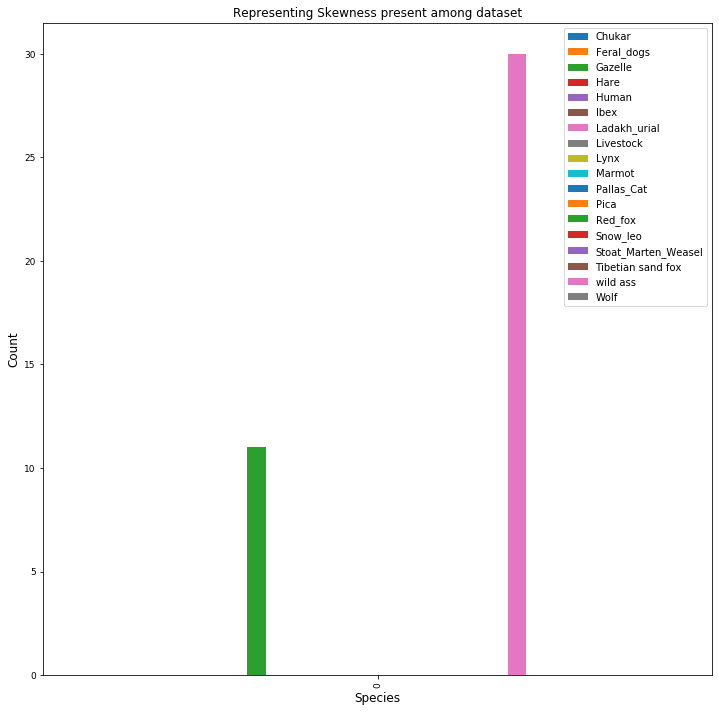

In [8]:
df_1=pd.DataFrame(dict_new,index=[0])
# visualise the skewness of data using matplotlib (only images in jpg format) 
ax = df_1.plot(kind='bar', title ="Representing Skewness present among dataset", figsize=(12,12), legend=True, fontsize=9)
ax.set_xlabel("Species", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [9]:
print(folders)

['D:\\datasets\\data\\Chukar', 'D:\\datasets\\data\\Feral_dogs', 'D:\\datasets\\data\\Gazelle', 'D:\\datasets\\data\\Hare', 'D:\\datasets\\data\\Human', 'D:\\datasets\\data\\Ibex', 'D:\\datasets\\data\\Ladakh_urial', 'D:\\datasets\\data\\Livestock', 'D:\\datasets\\data\\Lynx', 'D:\\datasets\\data\\Marmot', 'D:\\datasets\\data\\Pallas_Cat', 'D:\\datasets\\data\\Pica', 'D:\\datasets\\data\\Red_fox', 'D:\\datasets\\data\\Snow_leo', 'D:\\datasets\\data\\Stoat_Marten_Weasel', 'D:\\datasets\\data\\Tibetian sand fox', 'D:\\datasets\\data\\wild ass', 'D:\\datasets\\data\\Wolf']


In [10]:
image_dict={}
image_list=[]
image_stats={}
counter=0
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        image_list.append(f)
        counter+=1
    folder_name=folder.split("D:\\datasets\\data\\")[1]
    image_dict[folder_name]=image_list
    image_list=[]
    image_stats[folder_name]=counter 
    counter=0       

In [11]:
image_stats
    

{'Chukar': 268,
 'Feral_dogs': 107,
 'Gazelle': 3,
 'Hare': 267,
 'Human': 292,
 'Ibex': 25,
 'Ladakh_urial': 108,
 'Livestock': 364,
 'Lynx': 26,
 'Marmot': 17,
 'Pallas_Cat': 70,
 'Pica': 200,
 'Red_fox': 259,
 'Snow_leo': 261,
 'Stoat_Marten_Weasel': 11,
 'Tibetian sand fox': 4,
 'wild ass': 87,
 'Wolf': 269}

In [12]:
mydict_keys=list(image_stats.keys())

In [13]:
print(mydict_keys)

['Chukar', 'Feral_dogs', 'Gazelle', 'Hare', 'Human', 'Ibex', 'Ladakh_urial', 'Livestock', 'Lynx', 'Marmot', 'Pallas_Cat', 'Pica', 'Red_fox', 'Snow_leo', 'Stoat_Marten_Weasel', 'Tibetian sand fox', 'wild ass', 'Wolf']


In [32]:
from PIL import Image
folder_name09='Tibetian sand fox'
folder_path='D:\new_dataset'
images=image_dict['Tibetian sand fox']
ndrry=[]
counter=0
for image in images:
    img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    clahe=cv2.createCLAHE(clipLimit=2.0)
    cl1=clahe.apply(img)
    mean=cl1.mean()
    min_image=cl1.min()
    max_image=cl1.max()
    cl1=(cl1-min_image)/(max_image-min_image)
    kernel_size = (5,5)
    blur = cv2.GaussianBlur(cl1,(5,5),0)
    foo=image_dict['Tibetian sand fox']
    path=foo[counter].split('D:\\datasets\\data\\Tibetian sand fox\\')[1]
    print(path)
    image_path=folder_path+'\'
    
    

    
    
    
plt.imshow(blur)
print(blur.shape)
    
    
    
    

SyntaxError: EOL while scanning string literal (<ipython-input-32-8c305b2bc459>, line 3)

In [27]:
images=image_dict['Tibetian sand fox']
print(images)

['D:\\datasets\\data\\Tibetian sand fox\\RCNX0049.JPG', 'D:\\datasets\\data\\Tibetian sand fox\\RCNX0050.JPG', 'D:\\datasets\\data\\Tibetian sand fox\\RCNX0051.JPG', 'D:\\datasets\\data\\Tibetian sand fox\\RCNX0052.JPG']


In [25]:
print(folder_name)

Wolf


0.0
1.0
(1440, 2048)


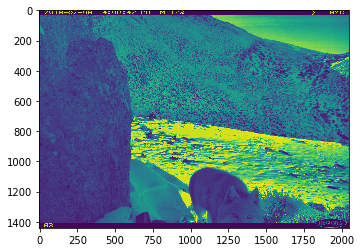

In [22]:
plt.imshow(cl1)
print(cl1.min())
print(cl1.max())
print(cl1.shape)

In [ ]:
images=image_dict['Chukar']

In [ ]:
print(images)

In [ ]:
img = cv2.imread(image)
clahe=cv2.createCLAHE(clipLimit=2.0)
cl1=clahe.apply(img)